Importation des librairies

In [21]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Préparation des données

Extraction des données d’intérêt : Sélectionner les colonnes pertinentes de la base de données selon ce besoin.

In [2]:
data = pd.read_csv("Data_Arbre.csv")
data_selection = data[["longitude", "latitude", "haut_tot"]].copy()
print(data_selection.head())
X, y = make_blobs(n_samples=len(data_selection))

   longitude   latitude  haut_tot
0   3.293264  49.840500       6.0
1   3.273380  49.861409      13.0
2   3.289068  49.844513      12.0
3   3.302387  49.861778      16.0
4   3.304047  49.858446       5.0


Apprentissage non supervisé

Choix de l'algorithme de clustering : Sélectionner un/des algorithme(s)de clustering pour séparer les arbres en groupes basés sur leur taille.

Métriques pour l'apprentissage non supervisé

In [22]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selection[['haut_tot']])

K-Means

Silhouette score 0.6183070397058021
Nombre cluster 2
Prédiction  :  [1 0 1 ... 1 1 1]
NMI 7.842334804013948e-05
Silhouette score 0.5593301601422991
Nombre cluster 3
Prédiction  :  [2 1 1 ... 2 2 2]
NMI 0.00021247016904888977
Silhouette score 0.5312709984240698
Nombre cluster 4
Prédiction  :  [2 0 1 ... 2 2 2]
NMI 0.00028015289210161533
Silhouette score 0.5206209284343126
Nombre cluster 5
Prédiction  :  [1 4 4 ... 2 2 2]
NMI 0.000314947004161869
Silhouette score 0.5430758546344249
Nombre cluster 6
Prédiction  :  [1 4 4 ... 2 2 2]
NMI 0.0005215373887914217
Silhouette score 0.5680916297281623
Nombre cluster 7
Prédiction  :  [1 6 4 ... 2 2 2]
NMI 0.0005186716261327733
Silhouette score 0.5480209311282863
Nombre cluster 8
Prédiction  :  [2 5 5 ... 2 2 2]
NMI 0.0005253293548422762
Silhouette score 0.5815673671439711
Nombre cluster 9
Prédiction  :  [2 5 5 ... 2 2 2]
NMI 0.0007017705329510999


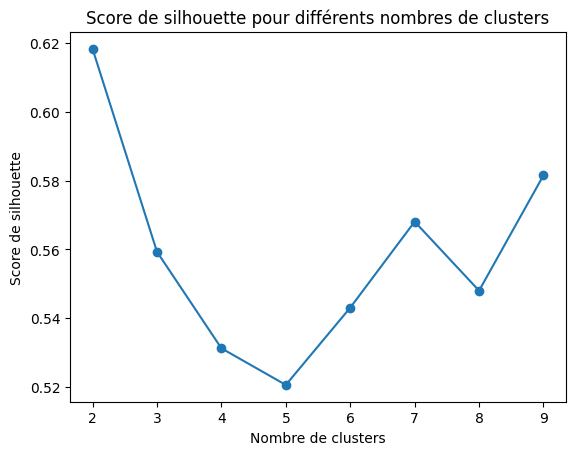

In [4]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)
    print("Silhouette score", score)
    print("Nombre cluster", k)
    print("Prédiction  : ", labels)
    NMI = normalized_mutual_info_score(y, labels)
    print("NMI", NMI)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

Mean shift

In [5]:
bandwidth = estimate_bandwidth(X)
print("Bandwidth", bandwidth)
shift = MeanShift(bandwidth=bandwidth)
predict_2 = shift.fit_predict(data_selection[["haut_tot"]])
print("Prédiction 2 : ", predict_2)
NMI_2 = normalized_mutual_info_score(y, predict_2)
print("NMI 2", NMI_2)

Bandwidth 2.844057545517451
Prédiction 2 :  [0 1 1 ... 0 0 0]
NMI 2 0.00036574326229382877


Spectral clustering

Silhouette score 0.5037650324531135
Nombre cluster 2
Prédiction 3 :  [1 1 1 ... 1 1 1]
NMI 3 0.0003087482445053015
Silhouette score 0.5037650324531135
Nombre cluster 3
Prédiction 3 :  [0 0 0 ... 0 0 0]
NMI 3 0.0003087482445053015
Silhouette score 0.5027781863204985
Nombre cluster 4
Prédiction 3 :  [0 0 0 ... 0 0 0]
NMI 3 0.00034199777532927856
Silhouette score 0.5027781863204985
Nombre cluster 5
Prédiction 3 :  [0 0 0 ... 0 0 0]
NMI 3 0.00034199777532927856
Silhouette score 0.5027781863204985
Nombre cluster 6
Prédiction 3 :  [0 0 0 ... 0 0 0]
NMI 3 0.00034199777532927856
Silhouette score 0.5037650324531135
Nombre cluster 7
Prédiction 3 :  [1 1 1 ... 1 1 1]
NMI 3 0.0003087482445053015
Silhouette score 0.5037650324531135
Nombre cluster 8
Prédiction 3 :  [2 2 2 ... 2 2 2]
NMI 3 0.00030874824450530144
Silhouette score 0.5027781863204985
Nombre cluster 9
Prédiction 3 :  [0 0 0 ... 0 0 0]
NMI 3 0.00034199777532927856


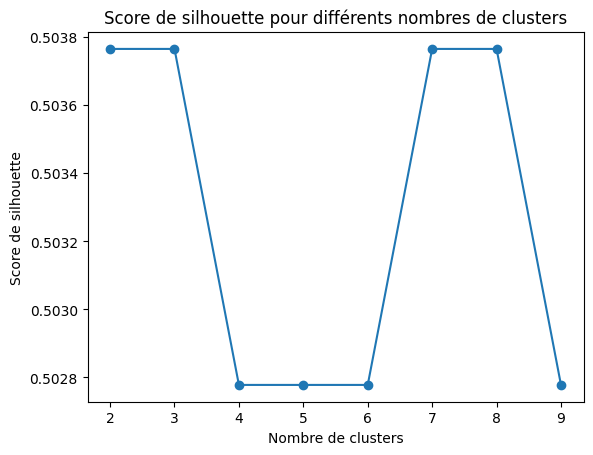

In [7]:
silhouette_scores = []
for k in range(2, 10):
    spectral = SpectralClustering(n_clusters=3)
    labels_2 = spectral.fit_predict(data_scaled)
    score_2 = silhouette_score(data_scaled, labels_2)
    silhouette_scores.append(score_2)
    print("Silhouette score", score_2)
    print("Nombre cluster", k)
    print("Prédiction 3 : ", labels_2)
    NMI_3 = normalized_mutual_info_score(y, labels_2)
    print("NMI 3",NMI_3)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

Agglomerative clustering

Silhouette score 0.6055870793786359
Nombre cluster 2
Prédiction 4 :  [0 0 0 ... 0 0 0]
NMI 4 0.00010284717881671155
Silhouette score 0.49247382945799917
Nombre cluster 3
Prédiction 4 :  [2 1 1 ... 2 2 2]
NMI 4 0.0003110448254845015
Silhouette score 0.4867699677974714
Nombre cluster 4
Prédiction 4 :  [2 0 0 ... 2 2 2]
NMI 4 0.0004307265640633508
Silhouette score 0.5168305884124318
Nombre cluster 5
Prédiction 4 :  [2 4 4 ... 2 2 2]
NMI 4 0.0004519679027258358
Silhouette score 0.5566786235910127
Nombre cluster 6
Prédiction 4 :  [2 4 4 ... 2 2 2]
NMI 4 0.0005093127362612691
Silhouette score 0.5615431306448517
Nombre cluster 7
Prédiction 4 :  [2 4 4 ... 2 2 2]
NMI 4 0.000503680845202741
Silhouette score 0.5696141470776126
Nombre cluster 8
Prédiction 4 :  [0 4 4 ... 0 0 0]
NMI 4 0.0005420319642544818
Silhouette score 0.5869931700544916
Nombre cluster 9
Prédiction 4 :  [7 4 4 ... 8 8 8]
NMI 4 0.0005515841452227197


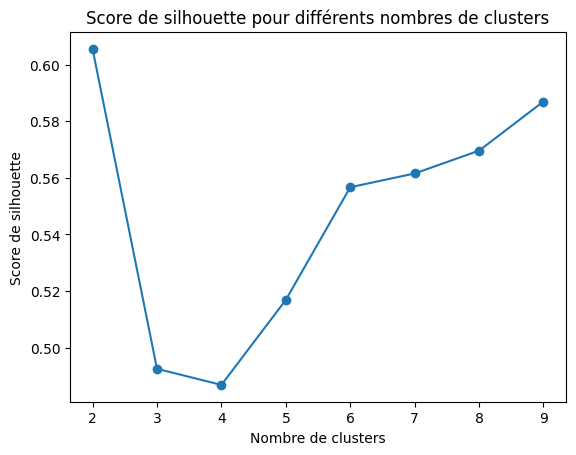

In [8]:
silhouette_scores = []
for k in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage = 'ward')
    labels_3 = ward.fit_predict(data_scaled)
    score_3 = silhouette_score(data_scaled, labels_3)
    silhouette_scores.append(score_3)
    print("Silhouette score", score_3)
    print("Nombre cluster", k)
    print("Prédiction 4 : ", labels_3)
    NMI_4 = normalized_mutual_info_score(y, labels_3)
    print("NMI 4",NMI_4)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

Birch

Silhouette score 0.5731226367347712
Nombre cluster 2
Prédiction 5 :  [1 1 1 ... 1 1 1]
NMI 5 2.1148961639206844e-05
Silhouette score 0.5414545533279859
Nombre cluster 3
Prédiction 5 :  [0 0 0 ... 0 0 0]
NMI 5 0.00010713520131896013
Silhouette score 0.5607260979974268
Nombre cluster 4
Prédiction 5 :  [3 1 1 ... 3 3 3]
NMI 5 0.00010000426533252085
Silhouette score 0.5766045946030127
Nombre cluster 5
Prédiction 5 :  [3 4 4 ... 3 3 3]
NMI 5 0.00030348720989199264


C:\Users\leabo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning:

Number of subclusters found (5) by BIRCH is less than (6). Decrease the threshold.



Silhouette score 0.5766045946030127
Nombre cluster 6
Prédiction 5 :  [0 1 1 ... 0 0 0]
NMI 5 0.00030348720989199264


C:\Users\leabo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning:

Number of subclusters found (5) by BIRCH is less than (7). Decrease the threshold.



Silhouette score 0.5766045946030127
Nombre cluster 7
Prédiction 5 :  [0 1 1 ... 0 0 0]
NMI 5 0.00030348720989199264


C:\Users\leabo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning:

Number of subclusters found (5) by BIRCH is less than (8). Decrease the threshold.



Silhouette score 0.5766045946030127
Nombre cluster 8
Prédiction 5 :  [0 1 1 ... 0 0 0]
NMI 5 0.00030348720989199264


C:\Users\leabo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning:

Number of subclusters found (5) by BIRCH is less than (9). Decrease the threshold.



Silhouette score 0.5766045946030127
Nombre cluster 9
Prédiction 5 :  [0 1 1 ... 0 0 0]
NMI 5 0.00030348720989199264


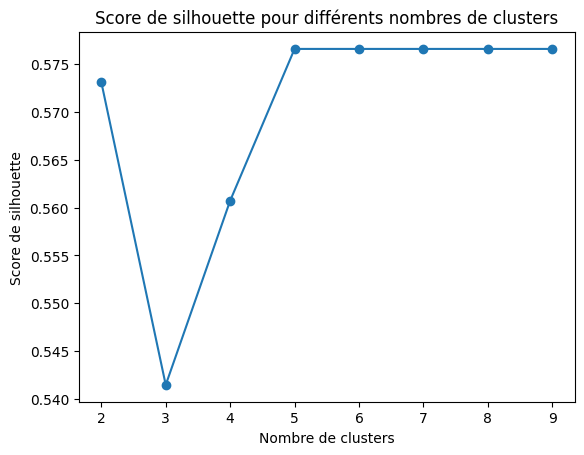

In [16]:
silhouette_scores = []
for k in range(2, 10):
    birch = Birch(n_clusters=k)
    labels_4 = birch.fit_predict(data_scaled)
    score_4 = silhouette_score(data_scaled, labels_4)
    silhouette_scores.append(score_4)
    print("Silhouette score", score_4)
    print("Nombre cluster", k)
    print("Prédiction 5 : ", labels_4)
    NMI_5 = normalized_mutual_info_score(y, labels_4)
    print("NMI 5",NMI_5)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

Visualisation sur la carte

In [24]:
k_means_test = KMeans(n_clusters=3)
labels_test = k_means_test.fit_predict(data_scaled)
print(labels_test)
data_selection_withpred = pd.concat([data_selection,pd.DataFrame({"cluster":labels_test})],axis=1)
print(data_selection)
    
fig = px.scatter_mapbox(data_selection, lat="latitude", lon="longitude", color="cluster",  mapbox_style='open-street-map')
fig_1 = px.box(data_selection, x="cluster", y="haut_tot")
fig.update_layout(mapbox=dict(style="open-street-map",zoom=12,center=dict(lat=data_selection["latitude"].mean(), 
lon=data_selection["longitude"].mean())),title_text="Dispersion des arbres par cluster")
fig_1.update_layout(title_text="Hauteur des arbres dans chaque cluster")
fig.show()
fig_1.show()

[1 0 0 ... 1 1 1]
      longitude   latitude  haut_tot  cluster  cluster
0      3.293264  49.840500       6.0        2        2
1      3.273380  49.861409      13.0        5        5
2      3.289068  49.844513      12.0        5        5
3      3.302387  49.861778      16.0        8        8
4      3.304047  49.858446       5.0        2        2
...         ...        ...       ...      ...      ...
7404   3.283505  49.848695       3.0        2        2
7405   3.283436  49.848682       3.0        2        2
7406   3.297078  49.860413       3.0        2        2
7407   3.291685  49.848009       3.0        2        2
7408   3.301788  49.861503       3.0        2        2

[7409 rows x 5 columns]


ValueError: Data must be 1-dimensional, got ndarray of shape (7409, 2) instead

Fonctionnalité supplémentaire : Détection des anomalies


Tests réalisés pour haut_tot, haut_tronc, tronc_diam, age_estim, fk_prec_estim

Number of outliers : 9


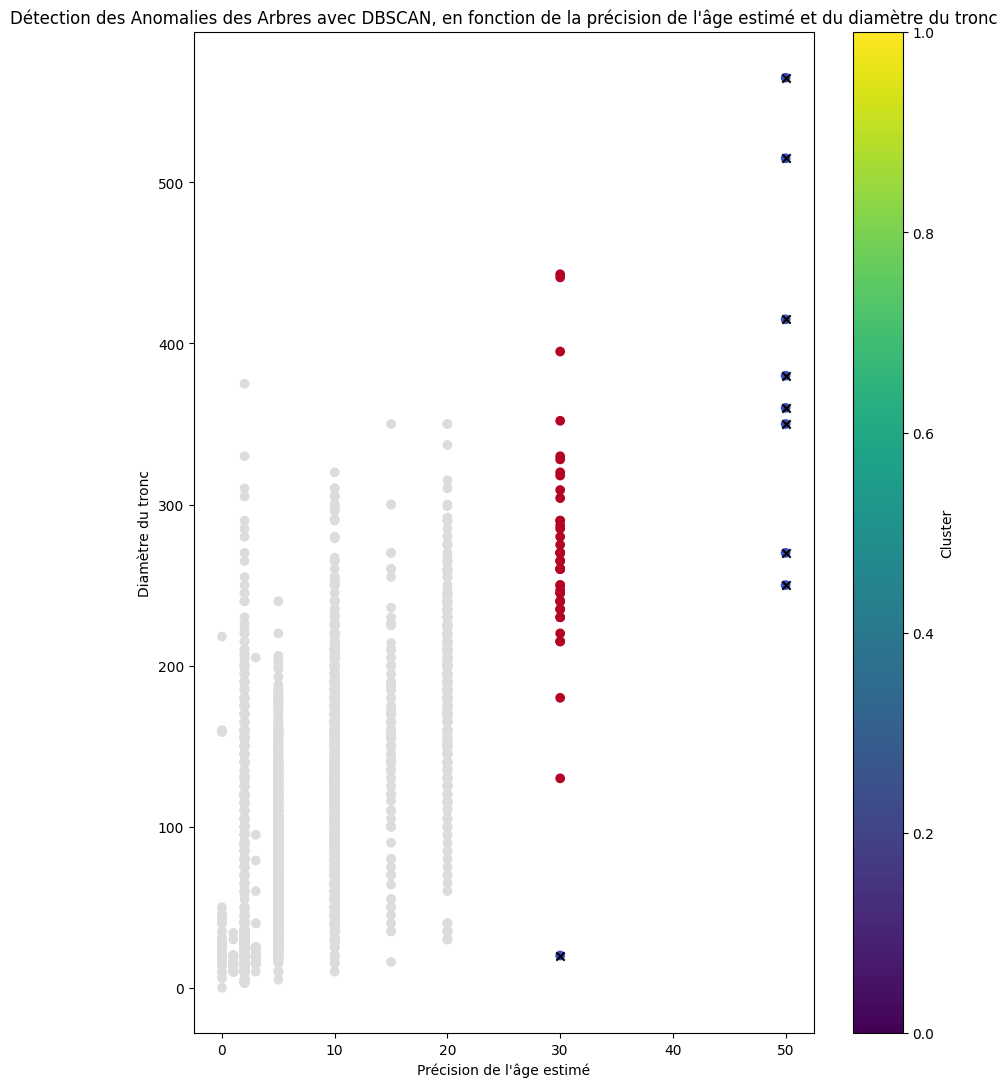

In [14]:
data_anomalies = data[["longitude", "latitude", "fk_prec_estim", "tronc_diam"]].copy()
data_anomalies_scaled = scaler.fit_transform(data_anomalies)
dbscan = DBSCAN(eps=1.5, min_samples=8)  # 2 à 4 fois le nombre de colonnes choisi
clusters = dbscan.fit_predict(data_anomalies_scaled)
data_anomalies['cluster'] = clusters
outliers = data_anomalies[data_anomalies['cluster'] == -1]
print("Number of outliers :", len(outliers))
plt.figure(figsize=(10, 13))
plt.scatter(data_anomalies['fk_prec_estim'], data_anomalies['tronc_diam'], c=data_anomalies['cluster'], cmap='coolwarm',
            label='Clusters')
plt.scatter(outliers['fk_prec_estim'], outliers['tronc_diam'], c='black', label='Outliers', marker='x')
plt.xlabel("Précision de l'âge estimé")
plt.ylabel("Diamètre du tronc")
plt.title("Détection des Anomalies des Arbres avec DBSCAN, en fonction de la précision de l'âge estimé et du diamètre du tronc")
plt.show()